In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
# Load the data
from sklearn import datasets
digits = datasets.load_digits()

In [5]:
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

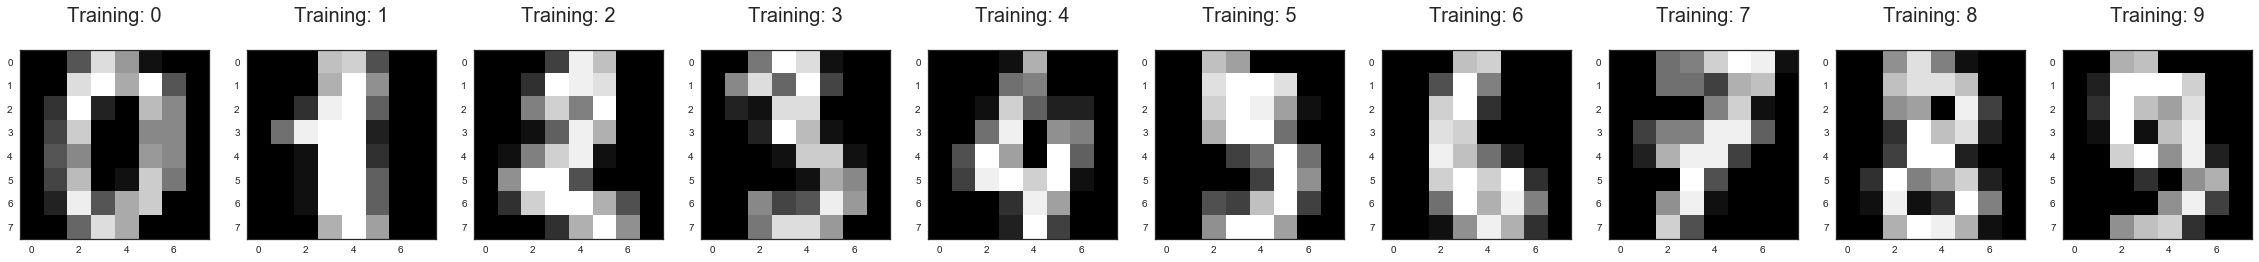

In [66]:
# Check some of the the images and the labels
plt.figure(figsize=(40,8))
sns.set_style("white")

row = 0
col = 0
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1, 10, index + 1)
    
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

plt.show()

In [85]:
# Set the training and test datas
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=0)

In [207]:
# Choosing the logisticr
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()

# Train the model 
logReg.fit(X_train, y_train)

# Test the model
y_pred = logReg.predict(X_test)

score = logReg.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.951851851852


In [214]:
# Calculate the prediction error for every prediction
errorPred = 1/abs(y_test-y_pred+1)

/Users/Rioux/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


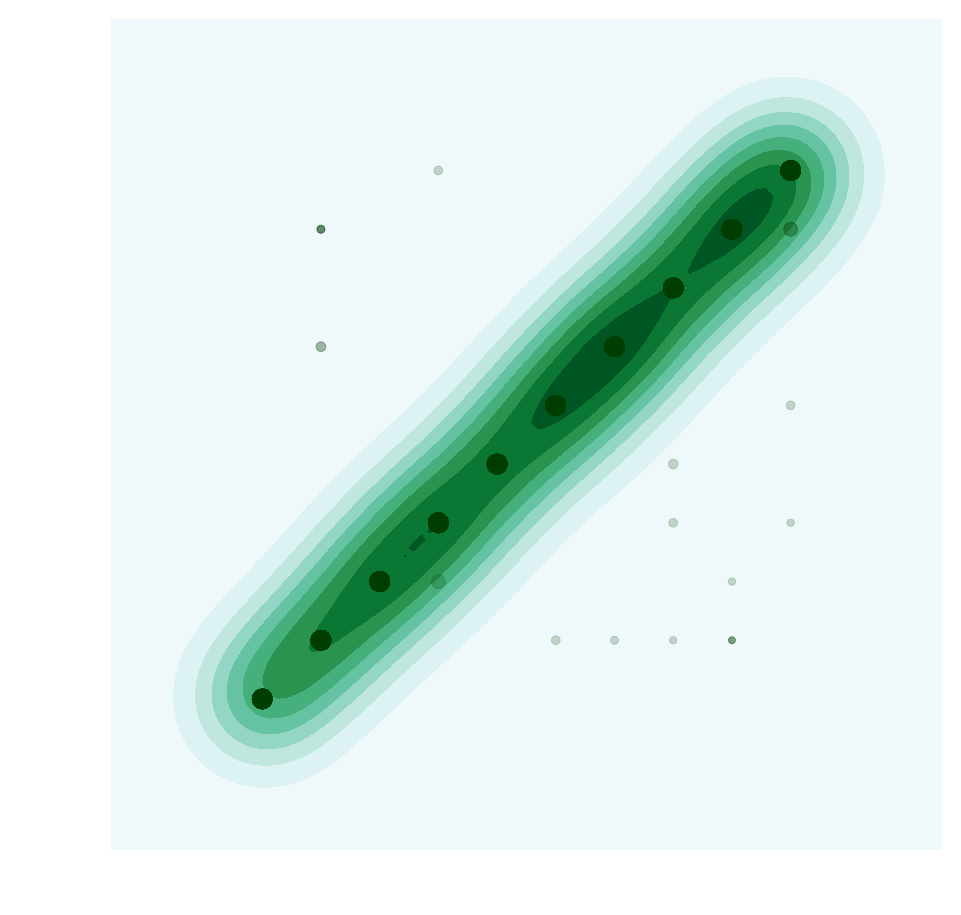

In [228]:
# Plot the boston house price prediction
fig = plt.figure(dpi=200)

sns.kdeplot(y_test, y_pred, shade=True)

plt.scatter(y_test, y_pred, s=errorPred*50, color="#003d00", alpha=0.2)

plt.axis("square")
plt.axis("off")


plt.ylabel("Predictions")


plt.show()